In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2679,2024-08-26,168.154999,169.380005,166.320007,167.929993,167.929993,11990300
2680,2024-08-27,167.610001,168.244995,166.160004,166.380005,166.380005,13718200
2681,2024-08-28,166.779999,167.389999,163.279999,164.500000,164.500000,15208700
2682,2024-08-29,166.059998,167.630005,161.981995,163.399994,163.399994,17133800


In [5]:
ma_100_days = data.Close.rolling(100).mean()

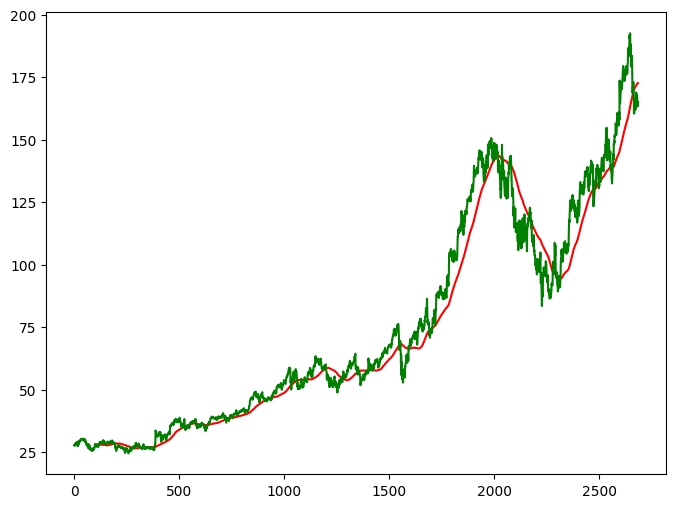

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

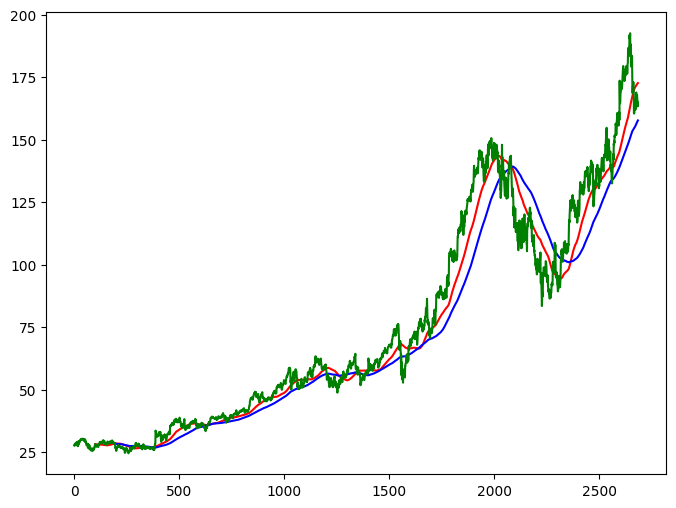

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2147

In [12]:
data_test.shape[0]

537

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM , Input
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 0.0600
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0065
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0055
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0052
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0055
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0056
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0044
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0046
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0037
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0043
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0040
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0044
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0053
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0045
Epoch 15/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - lo

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

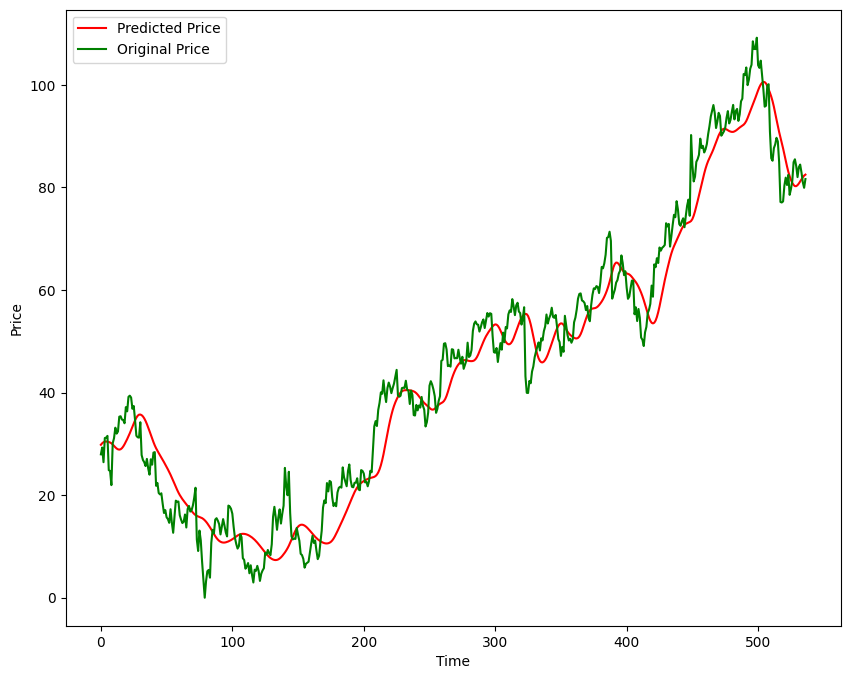

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')